Import libraries, including the custom ones.

In [64]:
import numpy as np
import scipy 

import matplotlib.pyplot as plt
import matplotlib 

import class_diag_hamiltonian as diag_heff
import class_energy as energy
import class_mass_size as mass_size

In [2]:
def plot_rotor_wavefunction(x, chosen_My, chosen_Mx, psi):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    ##plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 18 

    fig, axs = plt.subplots(chosen_My,chosen_Mx, subplot_kw=dict(polar=True))
    #plt.suptitle(r'$V_0 =$'+str(V_0), fontsize=font_size)

    for i in range(chosen_My):
         for j in range(chosen_Mx):
            axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_My/2))%chosen_My], color='lightcoral')

            axs[i, j].set_yticklabels([])
            axs[i, j].set_xticklabels([])
            axs[i, j].set_theta_zero_location('E')

            axs[i, j].grid(linewidth=0.5)
            axs[i, j].spines['polar'].set_linewidth(0.3)


In [49]:
def plot_rotor_wavefunction_first_quadrant(x, chosen_My, chosen_Mx, psi, psi2):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    ##plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 18 

    fig, axs = plt.subplots(chosen_My,chosen_Mx, subplot_kw=dict(polar=True))
    #plt.suptitle(r'$V_0 =$'+str(V_0), fontsize=font_size)

    for i in range(chosen_My):
         for j in range(chosen_Mx):
            axs[i, j].plot(x, psi2[i,j], color='lightblue')
            axs[i, j].plot(x, psi[i,j], color='lightcoral', linestyle='dashed')
            
            axs[i, j].set_yticklabels([])
            axs[i, j].set_xticklabels([])
            axs[i, j].set_theta_zero_location('E')

            axs[i, j].grid(linewidth=0.5)
            axs[i, j].spines['polar'].set_linewidth(0.3)


In [4]:
def plot_comp_wf(psi1, psi2, exc_number, image_name):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 25

    fig = plt.figure(figsize=(15,10), facecolor='white')
    ax = plt.gca()

    ax1 = ax.twinx()
    
    p1, = ax.plot(psi1[0].real, linewidth=0.9, color='tab:blue')
    p1, = ax.plot(psi2.real, linewidth=0.9, color='tab:green', label=r'Reference GS')
    
    for i in range(1,exc_number):
        p0, = ax1.plot(psi1[i].real, linewidth=0.9)

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6, fontsize=font_size)
    ax.tick_params(axis='x', direction='in', top=True, length=8, labelsize=font_size)
    ax.tick_params(axis='y', direction='in', right=False, length=8, labelsize=font_size)
    ax.tick_params(which='minor', axis='y', direction='in', right=False)
    
    ax.set_xlabel(r'Angle Grid $\phi$', fontsize=font_size)
    ax.set_ylabel(r'Wavefunction $\psi(\phi)$', fontsize=font_size)

    #ax1.legend(loc='upper center', bbox_to_anchor=(0.3+0.1, 1.15), ncol=1, fontsize=font_size)
    ax1.tick_params(axis='y', colors=p1.get_color(), direction='in', right=True, length=8, labelsize=font_size)
    ax1.tick_params(which='minor', axis='y', direction='in', right=True)
    ax1.yaxis.label.set_color(p1.get_color())

    plt.savefig(image_name+'.pdf', dpi=400, bbox_inches='tight')

### Create Param Object and read reference configuration

In [5]:
params = {"n": 256,
"M": 36,
"Mx": 6,
"converge_new_lattice": "no",
"My": 6,
"B": 1.0,
"tx": 90,
"ty": 100,
"V_0": 80.0,
"qx": 0,
"qy": 0,
"init_choice": " ",
"external_wf_tag": " ",
"excitation_no": 11,
"n_states": 0,
"path_to_input_wavefunction": " ",
"dt": 0.001,
"tol": 1e-12}

x = (2*np.pi/params["n"])*np.arange(params["n"])

Mx = params["Mx"]
My = params["My"]

n = params["n"]

tx = params["tx"]
ty = params["ty"]

B = params["B"]

scale = B 

exc_number = params["excitation_no"]

#ferro_order = np.load('matrix_results/psi_rotors_2d_python_M_10000_B_1.0_tx_90.0_ty_100.0_Vmin_10.0_Vmax_180.0/psi_rotors_2d_imag_time_prop_M_10000_Mx_100_My_100_B_1.0_tx_90.0_ty_100.0_Vmin_10.0_Vmax_180.0_qx_0_qy_0_dt_0.001_init_uniform_V0_40.0.npy')
ref_state = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_uniform_V0_80.0.npy')
ref_state_fdv = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_ferro_domain_vertical_wall_V0_80.0.npy')
ref_state_fdh = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_ferro_domain_horizontal_wall_V0_80.0.npy')
ref_state_sp = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_small_polaron_V0_80.0.npy')

#ref_state = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_uniform_V0_110.0.npy')
#ref_state_fdv = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_ferro_domain_vertical_wall_V0_110.0.npy')
#ref_state_fdh = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_ferro_domain_horizontal_wall_V0_110.0.npy')
#ref_state_sp = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_small_polaron_V0_110.0.npy')

results_path = 'image_results/MRCI_M_36_B_1.0_tx_90_ty_100_V_80/excitation_analysis/'

Verify the reference configurations

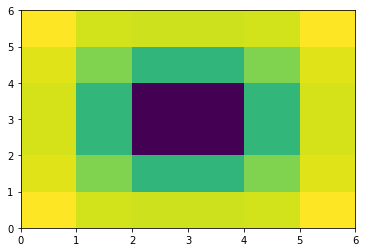

In [6]:
state_to_verify = ref_state

polaron_size_object = mass_size.polaron_size(params=params)

verify_state_sigma = polaron_size_object.calc_polaron_size(state_to_verify, '1')
plt.pcolormesh(verify_state_sigma)

### Correct the ref states with a SCF optimization

We perform an iterative procedure, diagonalizing the eff. Hamiltonian for every rotor and constructing a new GS from the minimum energy state of the diagonalization.

In [7]:
coupl_object = energy.coupling_of_states(params=params)
diag_object = diag_heff.diagonalization(params=params)
mult_ref_object = diag_heff.multi_ref_ci(params=params)

q = np.array([params['qx'],params['qy']])

''' 
- iter_number: iterations of the SCF algorithm
- mult_ref_object.set_phase_bool: whether to set the phase or not
'''
iter_number = 5
mult_ref_object.set_phase_bool = True

new_ref_gs, conv_energ_gs, overlap_arr = mult_ref_object.creat_new_ref_state(iter_number, ref_state, q)
new_ref_gs_fdv, conv_energ_gs_fdv, overlap_arr_fdv = mult_ref_object.creat_new_ref_state(iter_number, ref_state_fdv, q)
new_ref_gs_fdh, conv_energ_gs_fdh, overlap_arr_fdh = mult_ref_object.creat_new_ref_state(iter_number, ref_state_fdh, q)
new_ref_gs_sp, conv_energ_gs_sp, overlap_arr_sp = mult_ref_object.creat_new_ref_state(iter_number, ref_state_sp, q)

Iter = 0 , Overlap = (0.9999999996910783+4.850935586341386e-13j)
Iter = 1 , Overlap = (0.9999999997003481+7.40201869081749e-14j)
Iter = 2 , Overlap = (0.9999999997071667+3.484310982493145e-14j)
Iter = 3 , Overlap = (0.9999999997141761+2.460848972244658e-14j)
Iter = 4 , Overlap = (0.9999999997207318+1.9424731001506823e-14j)
Iter = 0 , Overlap = (0.9999999997402573-7.496300851282381e-11j)
Iter = 1 , Overlap = (0.9999999997707547+2.4731138336972633e-12j)
Iter = 2 , Overlap = (0.9999999997886084+2.6813827848941953e-12j)
Iter = 3 , Overlap = (0.9999999998097732+1.861938539950934e-12j)
Iter = 4 , Overlap = (0.9999999998250925+1.3533648438638286e-12j)
Iter = 0 , Overlap = (0.9999999996790883+3.6764428416377646e-13j)
Iter = 1 , Overlap = (0.9999999997204567+4.612803616013466e-14j)
Iter = 2 , Overlap = (0.9999999997440409+2.1780710473300584e-14j)
Iter = 3 , Overlap = (0.9999999997719505+1.4645178472052816e-14j)
Iter = 4 , Overlap = (0.9999999997918972+1.0493153634999444e-14j)
Iter = 0 , Overlap

Verification of the iterative procedure: 

- check energy (should decrease monotonous)
- check polaron size and rotor densities

Text(0, 0.5, 'Energy')

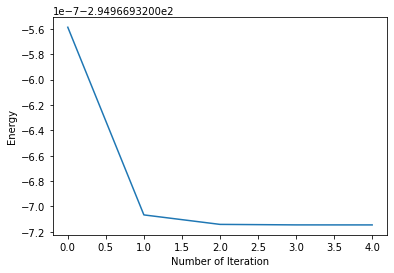

In [11]:
conv_energ_gs_to_plot = conv_energ_gs_sp

plt.plot(conv_energ_gs_to_plot.real)

plt.xlabel(r'Number of Iteration')
plt.ylabel(r'Energy')

#plt.savefig(results_path+'1_energy_sp.pdf')

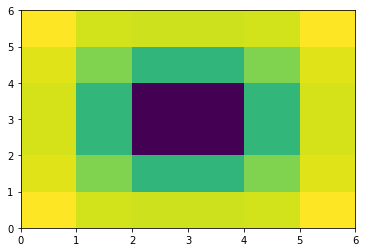

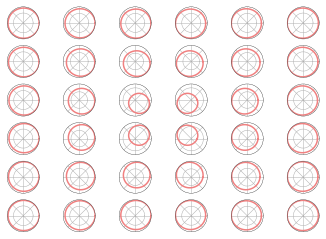

In [12]:
state_to_plot = ref_state

ref_state_sigma = polaron_size_object.calc_polaron_size(state_to_plot, '1')
plt.pcolormesh(ref_state_sigma)

plot_rotor_wavefunction(x, My, Mx, np.abs(state_to_plot)**2)

### Create Single-Excitation Objects from the new reference states

- 1st: diagonalize the effective Hamiltonian for every rotor

In [8]:
energy_exc_states, ref_exc_states = diag_object.diag_h_eff(new_ref_gs)
energy_exc_states_fdv, ref_exc_states_fdv = diag_object.diag_h_eff(new_ref_gs_fdv)
energy_exc_states_fdh, ref_exc_states_fdh = diag_object.diag_h_eff(new_ref_gs_fdh)
energy_exc_states_sp, ref_exc_states_sp = diag_object.diag_h_eff(new_ref_gs_sp)

- 2nd: visualize the excitation spectrum on four representative rotors for one of the four reference states

Rough interpreation: What we see is that the excitation on non-core rotors is well-described by angular momentum states (i.e. plane-waves). This can be  understood from the expression of the effective Hamiltonian. 

Exc Energies (1,1) = [-61.34468783+0.j -49.26629454+0.j -37.35281078+0.j -25.88268087+0.j
 -14.48964599+0.j  -3.65529053+0.j   7.14241556+0.j  17.32366799+0.j
  27.40283574+0.j  36.87548191+0.j]
Exc Energies (0,2) = [ 1.        +0.j  1.00002077+0.j  4.        +0.j  4.0000032 +0.j
  9.        +0.j  9.00000064+0.j 16.        +0.j 16.00000012+0.j
 25.        +0.j 25.00000002+0.j]
Exc Energies (2,0) = [ 1.        +0.j  1.00002789+0.j  4.        +0.j  4.0000043 +0.j
  9.        +0.j  9.00000086+0.j 16.        +0.j 16.00000016+0.j
 25.        +0.j 25.00000002+0.j]
Exc Energies (2,2) = [ 1.+0.j  1.+0.j  4.+0.j  4.+0.j  9.+0.j  9.+0.j 16.+0.j 16.+0.j 25.+0.j
 25.+0.j]

Diff Exc Energies (1,1) = [12.0783933 +0.j 11.91348376+0.j 11.47012991+0.j 11.39303488+0.j
 10.83435546+0.j 10.79770608+0.j 10.18125244+0.j 10.07916775+0.j
  9.47264617+0.j]
Diff Exc Energies (0,2) = [2.07652094e-05+0.j 2.99997923e+00+0.j 3.20034662e-06+0.j
 4.99999680e+00+0.j 6.37939474e-07+0.j 6.99999936e+00+0.j
 1.17499200e-0

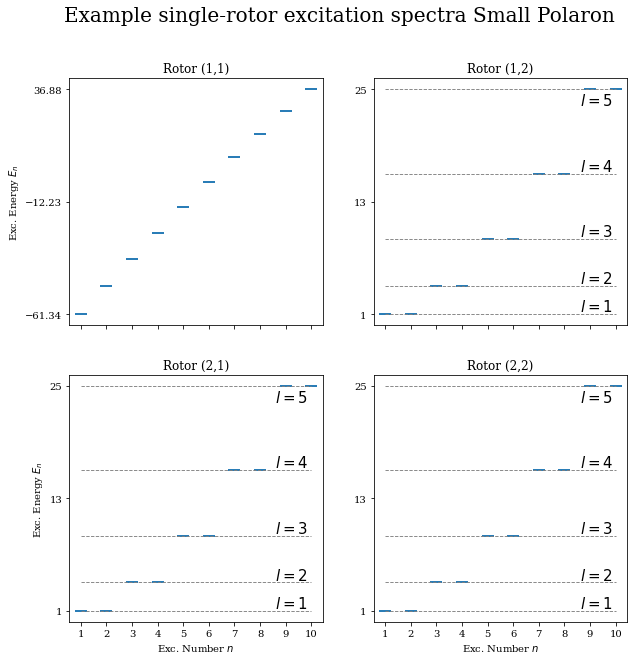

In [9]:
''' 
set the excitation spectrum to display
'''
exc_energies_to_plot = energy_exc_states_sp

print('Exc Energies (1,1) =', exc_energies_to_plot[0,0][1:])
print('Exc Energies (0,2) =', exc_energies_to_plot[0,1][1:])
print('Exc Energies (2,0) =', exc_energies_to_plot[1,0][1:])
print('Exc Energies (2,2) =', exc_energies_to_plot[1,1][1:])

print('\nDiff Exc Energies (1,1) =', np.diff(exc_energies_to_plot[0,0][1:]))
print('Diff Exc Energies (0,2) =', np.diff(exc_energies_to_plot[0,1][1:]))
print('Diff Exc Energies (2,0) =', np.diff(exc_energies_to_plot[1,0][1:]))
print('Diff Exc Energies (2,2) =', np.diff(exc_energies_to_plot[1,1][1:]))

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('font', family='serif')

fig = plt.figure(figsize=(10,10)) 
gs = fig.add_gridspec(2,2, hspace=0.2, wspace=0.2)
axs = gs.subplots(sharex=True)

plt.suptitle(r'Example single-rotor excitation spectra Small Polaron', fontsize=20)

axs[0,0].scatter(np.arange(exc_number-1)+1, exc_energies_to_plot[0,0][1:].real, marker="_", s=130, linewidth=1.9)
axs[0,1].scatter(np.arange(exc_number-1)+1, exc_energies_to_plot[0,1][1:].real, marker="_", s=130, linewidth=1.9)
axs[1,0].scatter(np.arange(exc_number-1)+1, exc_energies_to_plot[1,0][1:].real, marker="_", s=130, linewidth=1.9)
axs[1,1].scatter(np.arange(exc_number-1)+1, exc_energies_to_plot[1,1][1:].real, marker="_", s=130, linewidth=1.9)

axs[0,1].hlines(y=1, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[0,1].hlines(y=4, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[0,1].hlines(y=9, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[0,1].hlines(y=16, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[0,1].hlines(y=25, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')

axs[1,0].hlines(y=1, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,0].hlines(y=4, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,0].hlines(y=9, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,0].hlines(y=16, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,0].hlines(y=25, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')

axs[1,1].hlines(y=1, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,1].hlines(y=4, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,1].hlines(y=9, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,1].hlines(y=16, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,1].hlines(y=25, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')

axs[0,1].text(x=exc_number-2.4, y=1.3, s=r'$l=1$', fontsize=15)
axs[0,1].text(x=exc_number-2.4, y=4.3, s=r'$l=2$', fontsize=15)
axs[0,1].text(x=exc_number-2.4, y=9.3, s=r'$l=3$', fontsize=15)
axs[0,1].text(x=exc_number-2.4, y=16.3, s=r'$l=4$', fontsize=15)
axs[0,1].text(x=exc_number-2.4, y=23.3, s=r'$l=5$', fontsize=15)

axs[1,0].text(x=exc_number-2.4, y=1.3, s=r'$l=1$', fontsize=15)
axs[1,0].text(x=exc_number-2.4, y=4.3, s=r'$l=2$', fontsize=15)
axs[1,0].text(x=exc_number-2.4, y=9.3, s=r'$l=3$', fontsize=15)
axs[1,0].text(x=exc_number-2.4, y=16.3, s=r'$l=4$', fontsize=15)
axs[1,0].text(x=exc_number-2.4, y=23.3, s=r'$l=5$', fontsize=15)

axs[1,1].text(x=exc_number-2.4, y=1.3, s=r'$l=1$', fontsize=15)
axs[1,1].text(x=exc_number-2.4, y=4.3, s=r'$l=2$', fontsize=15)
axs[1,1].text(x=exc_number-2.4, y=9.3, s=r'$l=3$', fontsize=15)
axs[1,1].text(x=exc_number-2.4, y=16.3, s=r'$l=4$', fontsize=15)
axs[1,1].text(x=exc_number-2.4, y=23.3, s=r'$l=5$', fontsize=15)

axs[0,0].set_title(r'Rotor (1,1)')
axs[0,1].set_title(r'Rotor (1,2)')
axs[1,0].set_title(r'Rotor (2,1)')
axs[1,1].set_title(r'Rotor (2,2)')

axs[0,0].set_ylabel(r'Exc. Energy $E_n$')
axs[1,0].set_ylabel(r'Exc. Energy $E_n$')
axs[1,0].set_xlabel(r'Exc. Number $n$')
axs[1,1].set_xlabel(r'Exc. Number $n$')

axs[0,0].set_xticks((np.arange(exc_number-1)+1).tolist())
axs[0,0].set_yticks([exc_energies_to_plot[0,0][1:][0].real, (np.max(exc_energies_to_plot[0,0][1:].real)+exc_energies_to_plot[0,0][1:][0].real)/2, np.max(exc_energies_to_plot[0,0][1:].real)])
axs[0,1].set_yticks([exc_energies_to_plot[0,1][1:][0].real, (np.max(exc_energies_to_plot[0,1][1:].real)+exc_energies_to_plot[0,1][1:][0].real)/2, np.max(exc_energies_to_plot[0,1][1:].real)])
axs[1,0].set_yticks([exc_energies_to_plot[1,0][1:][0].real, (np.max(exc_energies_to_plot[1,0][1:].real)+exc_energies_to_plot[1,0][1:][0].real)/2, np.max(exc_energies_to_plot[1,0][1:].real)])
axs[1,1].set_yticks([exc_energies_to_plot[1,1][1:][0].real, (np.max(exc_energies_to_plot[1,1][1:].real)+exc_energies_to_plot[1,1][1:][0].real)/2, np.max(exc_energies_to_plot[1,1][1:].real)])

plt.savefig(results_path+'single_excitation_spectra_small_polaron.svg')

### Visualization of effective Hamiltonian and States

To understand the origin of the excitation spectrum shown above, we analyze the effective potential and the single-excitation wavefunctions.

min V_eff 1 = (-80.95185181629982+2.9006878211523713e-42j)
max V_eff 1 = (79.99997398132278-9.629649035860451e-33j)

min V_eff 2 = (-0.7475213810125134+2.320697434737985e-27j)
max V_eff 2 = (-0.7475213810118564+2.3206974347380095e-27j)

min V_eff 3 = (-4.0577102821356945+5.0487097934144756e-27j)
max V_eff 3 = (-1.2053518959256406e-07+3.009262511300373e-34j)

min V_eff 4 = (-0.7475213810125206+2.6326884560790237e-27j)
max V_eff 4 = (-0.7475213810118556+2.6326884560790198e-27j)


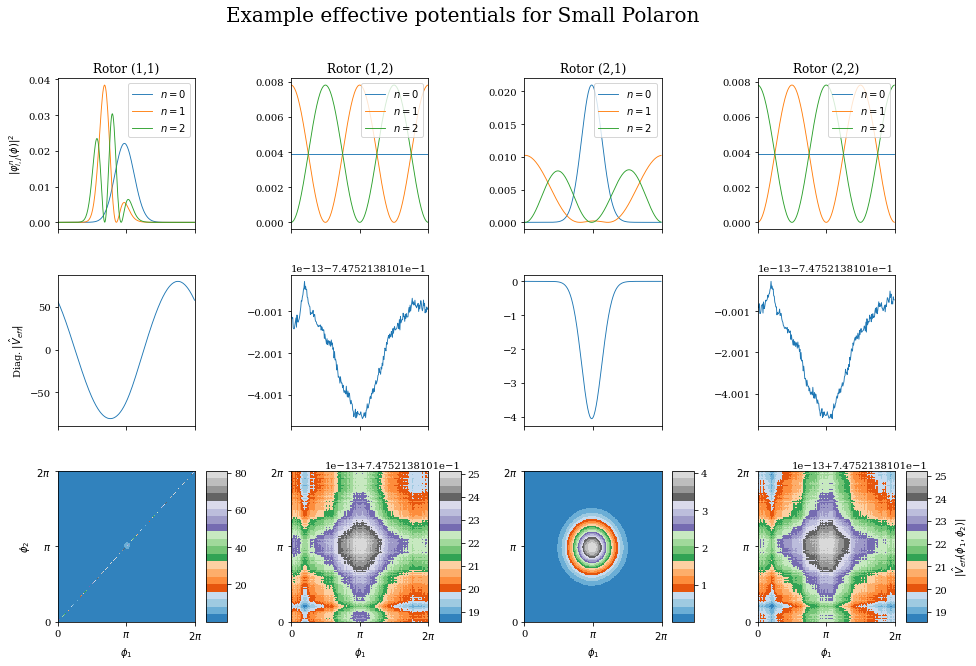

In [10]:
'''
Select the Reference of which to display the excitations.
'''
ref_state_to_plot = new_ref_gs_fdv
exc_state_to_plot = ref_exc_states_fdv

index_i1 = 0 # rotor index along My
index_j1 = 0 # rotor index along Mx

index_i2 = 0 # rotor index along My
index_j2 = 1 # rotor index along Mx

index_i3 = 1 # rotor index along My
index_j3 = 0 # rotor index along Mx

index_i4 = 1 # rotor index along My
index_j4 = 1 # rotor index along Mx

V_psi1 = diag_object.single_rotor_eff_potential(ref_state_to_plot, index_i1, index_j1)
V_psi2 = diag_object.single_rotor_eff_potential(ref_state_to_plot, index_i2, index_j2)
V_psi3 = diag_object.single_rotor_eff_potential(ref_state_to_plot, index_i3, index_j3)
V_psi4 = diag_object.single_rotor_eff_potential(ref_state_to_plot, index_i4, index_j4)

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('font', family='serif')

fig = plt.figure(figsize=(15,10)) 
gs = fig.add_gridspec(3,4, hspace=0.3, wspace=0.7)
axs = gs.subplots(sharex=True)

plt.suptitle(r'Example effective potentials for Small Polaron', fontsize=20)

axs[0,0].set_title(r'Rotor ('+str(index_i1+1)+r','+str(index_j1+1)+r')')
axs[0,1].set_title(r'Rotor ('+str(index_i2+1)+r','+str(index_j2+1)+r')')
axs[0,2].set_title(r'Rotor ('+str(index_i3+1)+r','+str(index_j3+1)+r')')
axs[0,3].set_title(r'Rotor ('+str(index_i4+1)+r','+str(index_j4+1)+r')')

axs[0,0].plot(np.abs(exc_state_to_plot[index_i1, index_j1, 0])**2, linewidth=0.9, label=r'$n=0$')
axs[0,0].plot(np.abs(exc_state_to_plot[index_i1, index_j1, 1])**2, linewidth=0.9, label=r'$n=1$')
axs[0,0].plot(np.abs(exc_state_to_plot[index_i1, index_j1, 2])**2, linewidth=0.9, label=r'$n=2$')

axs[0,1].plot(np.abs(exc_state_to_plot[index_i2, index_j2, 0])**2, linewidth=0.9, label=r'$n=0$')
axs[0,1].plot(np.abs(exc_state_to_plot[index_i2, index_j2, 1])**2, linewidth=0.9, label=r'$n=1$')
axs[0,1].plot(np.abs(exc_state_to_plot[index_i2, index_j2, 2])**2, linewidth=0.9, label=r'$n=2$')

axs[0,2].plot(np.abs(exc_state_to_plot[index_i3, index_j3, 0])**2, linewidth=0.9, label=r'$n=0$')
axs[0,2].plot(np.abs(exc_state_to_plot[index_i3, index_j3, 1])**2, linewidth=0.9, label=r'$n=1$')
axs[0,2].plot(np.abs(exc_state_to_plot[index_i3, index_j3, 2])**2, linewidth=0.9, label=r'$n=2$')

axs[0,3].plot(np.abs(exc_state_to_plot[index_i4, index_j4, 0])**2, linewidth=0.9, label=r'$n=0$')
axs[0,3].plot(np.abs(exc_state_to_plot[index_i4, index_j4, 1])**2, linewidth=0.9, label=r'$n=1$')
axs[0,3].plot(np.abs(exc_state_to_plot[index_i4, index_j4, 2])**2, linewidth=0.9, label=r'$n=2$')

axs[1,0].plot(V_psi1.real.diagonal(), linewidth=0.9)
axs[1,1].plot(V_psi2.real.diagonal(), linewidth=0.9)
axs[1,2].plot(V_psi3.real.diagonal(), linewidth=0.9)
axs[1,3].plot(V_psi4.real.diagonal(), linewidth=0.9)

pc1 = axs[2,0].pcolormesh(np.abs(V_psi1), cmap='tab20c', linewidth=0, rasterized=True)
pc2 = axs[2,1].pcolormesh(np.abs(V_psi2), cmap='tab20c', linewidth=0, rasterized=True)
pc3 = axs[2,2].pcolormesh(np.abs(V_psi3), cmap='tab20c', linewidth=0, rasterized=True)
pc4 = axs[2,3].pcolormesh(np.abs(V_psi4), cmap='tab20c', linewidth=0, rasterized=True)
pc1.set_edgecolor('face')
pc2.set_edgecolor('face')
pc3.set_edgecolor('face')
pc4.set_edgecolor('face')

cax1 = fig.add_axes([axs[2,0].get_position().x1+0.01,axs[2,0].get_position().y0,0.02,axs[2,0].get_position().height])
cax2 = fig.add_axes([axs[2,1].get_position().x1+0.01,axs[2,1].get_position().y0,0.02,axs[2,1].get_position().height])
cax3 = fig.add_axes([axs[2,2].get_position().x1+0.01,axs[2,2].get_position().y0,0.02,axs[2,2].get_position().height])
cax4 = fig.add_axes([axs[2,3].get_position().x1+0.01,axs[2,3].get_position().y0,0.02,axs[2,3].get_position().height])

cbar1 = fig.colorbar(pc1, cax=cax1)
cbar2 = fig.colorbar(pc2, cax=cax2)
cbar3 = fig.colorbar(pc3, cax=cax3)
cbar4 = fig.colorbar(pc4, cax=cax4)

axs[0,0].legend() 
axs[0,1].legend() 
axs[0,2].legend() 
axs[0,3].legend() 

#cbar3.ax.tick_params(length=6)
cbar4.set_label(label=r'$|\hat{V}_{eff}(\phi_1,\phi_2)|$')

axs[2,0].set_xticks([0,int(256/2),256])
axs[2,0].set_xticklabels([r'0', r'$\pi$', r'$2\pi$'])
axs[2,0].set_yticks([0,int(256/2),256])
axs[2,0].set_yticklabels([r'0', r'$\pi$', r'$2\pi$'])
axs[2,1].set_yticks([0,int(256/2),256])
axs[2,1].set_yticklabels([r'0', r'$\pi$', r'$2\pi$'])
axs[2,2].set_yticks([0,int(256/2),256])
axs[2,2].set_yticklabels([r'0', r'$\pi$', r'$2\pi$'])
axs[2,3].set_yticks([0,int(256/2),256])
axs[2,3].set_yticklabels([r'0', r'$\pi$', r'$2\pi$'])

axs[0,0].set_ylabel(r'$|\varphi_{i,j}^n(\phi)|^2$')
axs[1,0].set_ylabel(r'Diag. $|\hat{V}_{eff}|$')

axs[2,0].set_ylabel(r'$\phi_2$')
axs[2,0].set_xlabel(r'$\phi_1$')
axs[2,1].set_xlabel(r'$\phi_1$')
axs[2,2].set_xlabel(r'$\phi_1$')
axs[2,3].set_xlabel(r'$\phi_1$')

print('min V_eff 1 =', np.min(V_psi1))
print('max V_eff 1 =', np.max(V_psi1))

print('\nmin V_eff 2 =', np.min(V_psi2))
print('max V_eff 2 =', np.max(V_psi2))

print('\nmin V_eff 3 =', np.min(V_psi3))
print('max V_eff 3 =', np.max(V_psi3))

print('\nmin V_eff 4 =', np.min(V_psi4))
print('max V_eff 4 =', np.max(V_psi4))

plt.savefig(results_path+'eff_potentials_small_polaron.svg')

Here, we show colorplots of the transfer integral projectors.

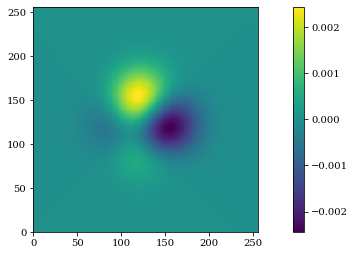

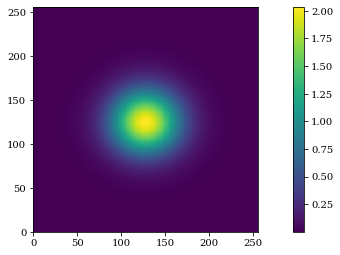

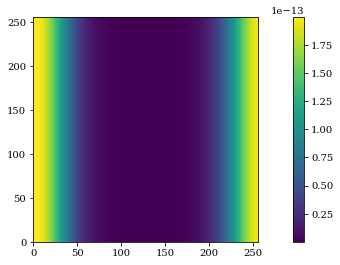

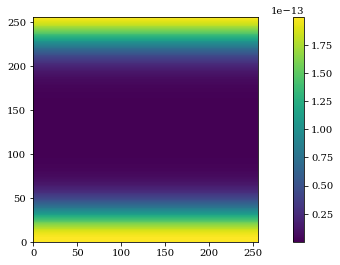

In [11]:
TDr_proj_psi1, TUr_proj_psi1, TRr_proj_psi1, TLr_proj_psi1 = diag_object.eff_individual_projector_terms(ref_state_to_plot, index_i1, index_j1)
TDr_proj_psi2, TUr_proj_psi2, TRr_proj_psi2, TLr_proj_psi2 = diag_object.eff_individual_projector_terms(ref_state_to_plot, index_i2, index_j2)
TDr_proj_psi3, TUr_proj_psi3, TRr_proj_psi3, TLr_proj_psi3 = diag_object.eff_individual_projector_terms(ref_state_to_plot, index_i3, index_j3)
TDr_proj_psi4, TUr_proj_psi4, TRr_proj_psi4, TLr_proj_psi4 = diag_object.eff_individual_projector_terms(ref_state_to_plot, index_i4, index_j4)

fig = plt.figure(); pc = plt.pcolormesh(np.abs(TDr_proj_psi3.real)-np.abs(TUr_proj_psi3.real)); cbar = fig.colorbar(pc); plt.axis('square'); plt.show()
fig = plt.figure(); pc = plt.pcolormesh(ty*np.abs(TUr_proj_psi3)); cbar = fig.colorbar(pc); plt.axis('square'); plt.show()
fig = plt.figure(); pc = plt.pcolormesh(tx*np.abs(TRr_proj_psi3)); cbar = fig.colorbar(pc); plt.axis('square'); plt.show()
fig = plt.figure(); pc = plt.pcolormesh(tx*np.abs(TLr_proj_psi3)); cbar = fig.colorbar(pc); plt.axis('square'); plt.show()

1 0
-1 0


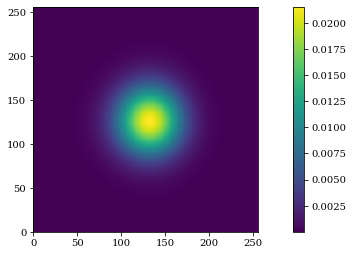

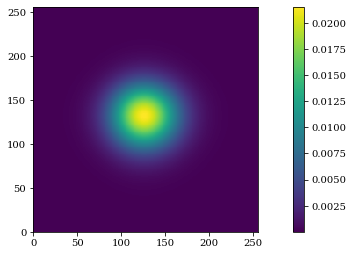

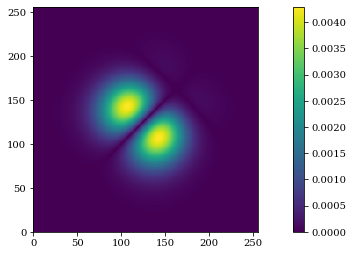

(0.004292204887187498+1.47356043478464e-13j)
-1 0
1 0


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


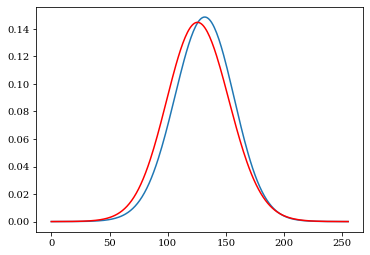

In [12]:
i1 = (index_i1 + 1)%My
j1 = index_j1

i2 = index_i1 - 1
j2 = index_j1

print(i1,j1)
print(i2,j2)

outer1 = ref_state_to_plot[i1,j1,:][:, np.newaxis] * np.conjugate(ref_state_to_plot)[i2,j2,:][np.newaxis, :]

i1 = index_i1 - 1 
j1 = index_j1

i2 = (index_i1 + 1)%My
j2 = index_j1

outer2 = ref_state_to_plot[i1,j1,:][:, np.newaxis] * np.conjugate(ref_state_to_plot)[i2,j2,:][np.newaxis, :]

fig = plt.figure(); pc = plt.pcolormesh(np.abs(outer1)); cbar = fig.colorbar(pc); plt.axis('square'); plt.show()
fig = plt.figure(); pc = plt.pcolormesh(np.abs(outer2)); cbar = fig.colorbar(pc); plt.axis('square'); plt.show()

fig = plt.figure(); pc = plt.pcolormesh(np.abs(outer2-outer1)); cbar = fig.colorbar(pc); plt.axis('square'); plt.show()

print(np.max(outer2-outer1))
print(i1,j1)
print(i2,j2)
plt.plot(ref_state_to_plot[i1,j1,:][:, np.newaxis])
plt.plot(np.conjugate(ref_state_to_plot)[i2,j2,:], color='red')


(0.06249999999998844-2.544668415454033e-15j)
(0.06250000000002184+6.233610794396705e-16j)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


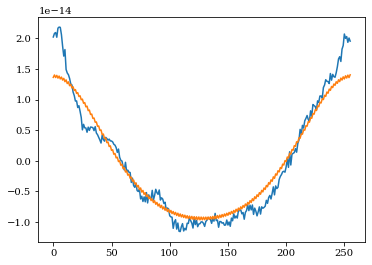

In [13]:
index_i = 4
index_j = 4

print(np.min(new_ref_gs_fdv[index_i,index_j]))
print(np.max(new_ref_gs_fdv[index_i,index_j]))

plt.plot(new_ref_gs_fdv[index_i,index_j]-1/256**0.5, color='tab:blue')
plt.plot(ref_state_fdv[index_i,index_j]-1/256**0.5, color='tab:orange')

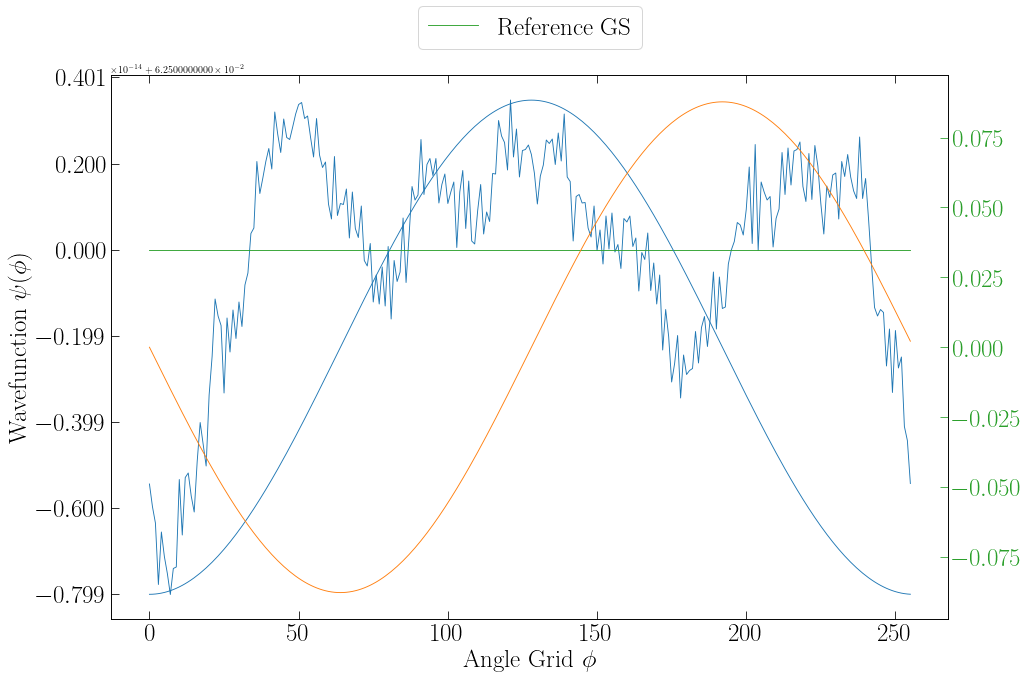

In [134]:
'''
choose the rotor index from which to display the excitation wavefunctions
'''
index_i = 2
index_j = 2

mult_ref_object.set_phase_bool = True

plot_comp_wf(ref_exc_states_fdv[index_i,index_j], mult_ref_object.set_phase(ref_state_fdv[index_i,index_j]), 3, '2_wavefunctions_rotor_fdv_01')


To get a better intuition, we visualize the orbitals of every rotor in polar plots.

Densities of Reference States:


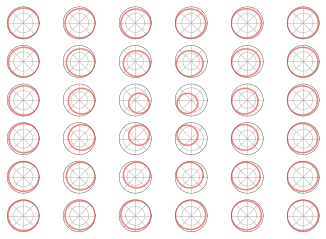

Densities of 1st Excited States:


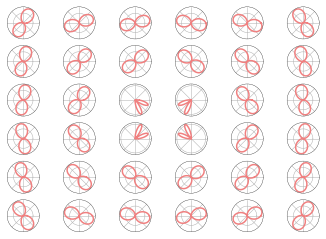

Densities of 2nd Excited States:


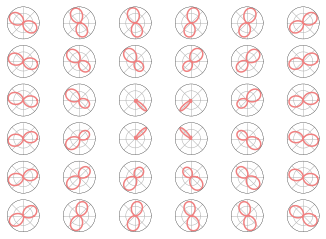

Density of 3rd Excited States:


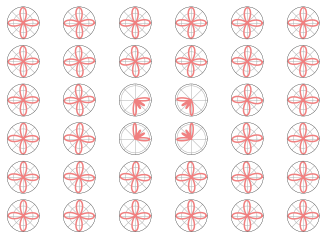

Densities of 4th Excited States:


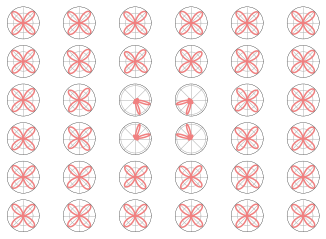

In [14]:
''' 
Select here the respective reference and excited state objects
'''
ref_state_to_plot = new_ref_gs.copy()
exc_ref_state = ref_exc_states.copy() 

exc_state_to_plot1 = ref_state_to_plot.copy()
exc_state_to_plot2 = ref_state_to_plot.copy()
exc_state_to_plot3 = ref_state_to_plot.copy()
exc_state_to_plot4 = ref_state_to_plot.copy()

for i in range(My):
    for j in range(Mx):
        exc_state_to_plot1[i,j] = exc_ref_state[i,j,1]
        exc_state_to_plot2[i,j] = exc_ref_state[i,j,2]
        exc_state_to_plot3[i,j] = exc_ref_state[i,j,3]
        exc_state_to_plot4[i,j] = exc_ref_state[i,j,4]

print('Densities of Reference States:')
plot_rotor_wavefunction(x, My, Mx, np.abs(ref_state_to_plot)**2); plt.savefig(results_path+'ferro-order_ref.svg'); plt.show()
print('Densities of 1st Excited States:')
plot_rotor_wavefunction(x, My, Mx, np.abs(exc_state_to_plot1)**2); plt.savefig(results_path+'ferro-order_1st.svg'); plt.show()
print('Densities of 2nd Excited States:')
plot_rotor_wavefunction(x, My, Mx, np.abs(exc_state_to_plot2)**2); plt.savefig(results_path+'ferro-order_2nd.svg'); plt.show()
print('Density of 3rd Excited States:')
plot_rotor_wavefunction(x, My, Mx, np.abs(exc_state_to_plot3)**2); plt.savefig(results_path+'ferro-order_3rd.svg'); plt.show()
print('Densities of 4th Excited States:')
plot_rotor_wavefunction(x, My, Mx, np.abs(exc_state_to_plot4)**2); plt.savefig(results_path+'ferro-order_4th.svg'); plt.show()

### Energies of the systems, if one rotor is excited

Here, we compute the rotor wavefunction where one rotor is excited and compute its energy. 

In [15]:
'''
Computes the energy of the new configuration if the (index_i,index_j)-th rotor is excited
'''
def total_state_exc_energies(index_i, index_j, exc_number, ref_fo, ref_fdv, ref_fdh, ref_sp, exc_fo, exc_fdv, exc_fdh, exc_sp):
    mult_ref_object.set_phase_bool = False

    E_arr_0 = np.zeros(exc_number, dtype=complex)
    E_arr_1 = np.zeros(exc_number, dtype=complex)
    E_arr_2 = np.zeros(exc_number, dtype=complex)
    E_arr_3 = np.zeros(exc_number, dtype=complex)
    for i in range(exc_number):
        psi_new_0 = ref_fo.copy()
        psi_new_1 = ref_fdv.copy()
        psi_new_2 = ref_fdh.copy()
        psi_new_3 = ref_sp.copy()

        psi_new_0[index_i,index_j] = mult_ref_object.set_phase(exc_fo[index_i,index_j,i])
        psi_new_1[index_i,index_j] = mult_ref_object.set_phase(exc_fdv[index_i,index_j,i])
        psi_new_2[index_i,index_j] = mult_ref_object.set_phase(exc_fdh[index_i,index_j,i])
        psi_new_3[index_i,index_j] = mult_ref_object.set_phase(exc_sp[index_i,index_j,i])

        E12_0, E_T12_0, E_B12_0, E_V12_0 = coupl_object.calc_hamiltonian_matrix_element(psi_new_0, q, psi_new_0, q)
        E12_1, E_T12_1, E_B12_1, E_V12_1 = coupl_object.calc_hamiltonian_matrix_element(psi_new_1, q, psi_new_1, q)
        E12_2, E_T12_2, E_B12_2, E_V12_2 = coupl_object.calc_hamiltonian_matrix_element(psi_new_2, q, psi_new_2, q)
        E12_3, E_T12_3, E_B12_3, E_V12_3 = coupl_object.calc_hamiltonian_matrix_element(psi_new_3, q, psi_new_3, q)
    
        #print(coupl_object.calc_hamiltonian_matrix_element(new_ref_gs_sp, q, psi_new_3, q)[0])

        if i == 0:
            print(E12_0, E_T12_0, E_B12_0, E_V12_0, E_T12_0+E_B12_0+E_V12_0)
            print(E12_1, E_T12_1, E_B12_1, E_V12_1, E_T12_1+E_B12_1+E_V12_1)
        
        E_arr_0[i] = E12_0
        E_arr_1[i] = E12_1
        E_arr_2[i] = E12_2
        E_arr_3[i] = E12_3

    return E_arr_0, E_arr_1, E_arr_2, E_arr_3

(-421.70353477470263+7.227163704990645e-19j) (-336.9609185470892-3.0371144851008955e-28j) (0.21049576944626797+7.227163708194208e-19j) (-84.95311199705971-1.6644849544366804e-29j) (-421.70353477470263+7.227163704990645e-19j)
(-398.7092751203567-9.946862163154834e-18j) (-191.36546167116578+8.329261823485918e-25j) (13.938827269355347-9.946863015631093e-18j) (-221.28264071854628+1.955007570364548e-26j) (-398.70927512035666-9.946862163154834e-18j)
(-421.7035347746892-1.1962343176651112e-18j) (-336.9609230437891+0j) (0.21049572763271854-1.1962343176510895e-18j) (-84.95310745853288-1.4021732960111372e-29j) (-421.7035347746892-1.1962343176651112e-18j)
(-398.7092751160476+2.1074469176097218e-18j) (-191.36547353911487+1.126643749265663e-24j) (13.938811475648222+2.1074457864833243e-18j) (-221.28261305258096+4.482648134025719e-27j) (-398.7092751160476+2.1074469176097218e-18j)
(-421.7035347746934-1.2683706632328766e-18j) (-336.96092302301133-4.8317730444786973e-29j) (0.21049570685073996-1.26837066

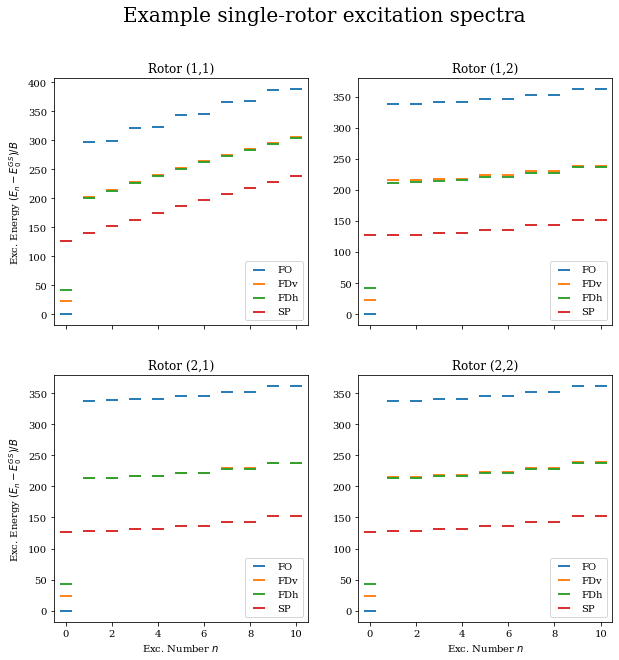

In [16]:
index_i1 = 0 # rotor index along My
index_j1 = 0 # rotor index along Mx

index_i2 = 0 # rotor index along My
index_j2 = 1 # rotor index along Mx

index_i3 = 1 # rotor index along My
index_j3 = 0 # rotor index along Mx

index_i4 = 1 # rotor index along My
index_j4 = 1 # rotor index along Mx

E1_arr_0, E1_arr_1, E1_arr_2, E1_arr_3 = total_state_exc_energies(index_i1, index_j1, exc_number, 
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E2_arr_0, E2_arr_1, E2_arr_2, E2_arr_3 = total_state_exc_energies(index_i2, index_j2, exc_number, 
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E3_arr_0, E3_arr_1, E3_arr_2, E3_arr_3 = total_state_exc_energies(index_i3, index_j3, exc_number, 
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E4_arr_0, E4_arr_1, E4_arr_2, E4_arr_3 = total_state_exc_energies(index_i4, index_j4, exc_number, 
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)

scale = B
print('E-Scale =', scale)

print('\nE Rotor (1,1) =', E1_arr_0)
print('E diff Rotor (1,1) =', np.diff(E1_arr_0))

print('\nE Rotor (1,2) =', E2_arr_0)
print('E diff Rotor (1,2) =', np.diff(E2_arr_0))

print('\nE Rotor (2,1) =', E3_arr_0)
print('E diff Rotor (2,1) =', np.diff(E3_arr_0))

print('\nE Rotor (2,2) =', E4_arr_0)
print('E diff Rotor (2,2) =', np.diff(E4_arr_0))

E1_offset = np.min([E1_arr_0, E1_arr_1, E1_arr_2, E1_arr_3])
E2_offset = np.min([E2_arr_0, E2_arr_1, E2_arr_2, E2_arr_3])
E3_offset = np.min([E3_arr_0, E3_arr_1, E3_arr_2, E3_arr_3])
E4_offset = np.min([E4_arr_0, E4_arr_1, E4_arr_2, E4_arr_3])

print('\n E1 offset =', E1_offset)
print('E2 offset =', E2_offset)
print('E3 offset =', E3_offset)
print('E4 offset =', E4_offset)

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('font', family='serif')

fig = plt.figure(figsize=(10,10)) 
gs = fig.add_gridspec(2,2, hspace=0.2, wspace=0.2)
axs = gs.subplots(sharex=True)

plt.suptitle(r'Example single-rotor excitation spectra', fontsize=20)

axs[0,0].scatter(np.arange(exc_number), (E1_arr_0-E1_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[0,0].scatter(np.arange(exc_number), (E1_arr_1-E1_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[0,0].scatter(np.arange(exc_number), (E1_arr_2-E1_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[0,0].scatter(np.arange(exc_number), (E1_arr_3-E1_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[0,1].scatter(np.arange(exc_number), (E2_arr_0-E2_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[0,1].scatter(np.arange(exc_number), (E2_arr_1-E2_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[0,1].scatter(np.arange(exc_number), (E2_arr_2-E2_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[0,1].scatter(np.arange(exc_number), (E2_arr_3-E2_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[1,0].scatter(np.arange(exc_number), (E3_arr_0-E3_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[1,0].scatter(np.arange(exc_number), (E3_arr_1-E3_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[1,0].scatter(np.arange(exc_number), (E3_arr_2-E3_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[1,0].scatter(np.arange(exc_number), (E3_arr_3-E3_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[1,1].scatter(np.arange(exc_number), (E4_arr_0-E4_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[1,1].scatter(np.arange(exc_number), (E4_arr_1-E4_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[1,1].scatter(np.arange(exc_number), (E4_arr_2-E4_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[1,1].scatter(np.arange(exc_number), (E4_arr_3-E4_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[0,0].legend(loc='lower right') 
axs[0,1].legend(loc='lower right') 
axs[1,0].legend(loc='lower right') 
axs[1,1].legend(loc='lower right') 

axs[0,0].set_title(r'Rotor (1,1)')
axs[0,1].set_title(r'Rotor (1,2)')
axs[1,0].set_title(r'Rotor (2,1)')
axs[1,1].set_title(r'Rotor (2,2)')

axs[0,0].set_ylabel(r'Exc. Energy $(E_n - E_0^{GS})/B$')
axs[1,0].set_ylabel(r'Exc. Energy $(E_n - E_0^{GS})/B$')
axs[1,0].set_xlabel(r'Exc. Number $n$')
axs[1,1].set_xlabel(r'Exc. Number $n$')

plt.savefig(results_path+'single-excitation_energies_total_configuration.svg')

Now, we have a look at the coupling of a selected reference state with excitations on a specific rotor in the other states.

In [17]:
'''
Computes the coupling of the new configuration if the (index_i,index_j)-th rotor is excited
'''
def coupling_state_with_exc_energies(index_i, index_j, exc_number, couple_state, ref_fo, ref_fdv, ref_fdh, ref_sp, exc_fo, exc_fdv, exc_fdh, exc_sp):
    mult_ref_object.set_phase_bool = False

    E_arr_0 = np.zeros(exc_number, dtype=complex)
    E_arr_1 = np.zeros(exc_number, dtype=complex)
    E_arr_2 = np.zeros(exc_number, dtype=complex)
    E_arr_3 = np.zeros(exc_number, dtype=complex)
    for i in range(exc_number):
        psi_new_0 = ref_fo.copy()
        psi_new_1 = ref_fdv.copy()
        psi_new_2 = ref_fdh.copy()
        psi_new_3 = ref_sp.copy()

        psi_new_0[index_i,index_j] = mult_ref_object.set_phase(exc_fo[index_i,index_j,i])
        psi_new_1[index_i,index_j] = mult_ref_object.set_phase(exc_fdv[index_i,index_j,i])
        psi_new_2[index_i,index_j] = mult_ref_object.set_phase(exc_fdh[index_i,index_j,i])
        psi_new_3[index_i,index_j] = mult_ref_object.set_phase(exc_sp[index_i,index_j,i])

        E12_0, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(couple_state, q, psi_new_0, q)
        E12_1, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(couple_state, q, psi_new_1, q)
        E12_2, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(couple_state, q, psi_new_2, q)
        E12_3, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(couple_state, q, psi_new_3, q)

        E_arr_0[i] = E12_0
        E_arr_1[i] = E12_1
        E_arr_2[i] = E12_2
        E_arr_3[i] = E12_3

    return E_arr_0, E_arr_1, E_arr_2, E_arr_3

E-Scale = 1.0

E Rotor (1,1) = [ 2.58386029-4.32518315e-13j  1.41925296+2.58237096e-14j
 -0.11655723+1.13662707e-14j  1.02061437+8.23938934e-13j
  0.38742344-1.74327484e-13j -0.60383121+2.30698903e-13j
 -0.47863415+8.44837959e-14j -0.27922081+9.14227124e-13j
  0.45805377-1.05013314e-13j  0.05967526-1.61173137e-13j
 -0.38758063+8.89598444e-14j]
E diff Rotor (1,1) = [-1.16460733+4.58342025e-13j -1.53581019-1.44574389e-14j
  1.1371716 +8.12572663e-13j -0.63319093-9.98266418e-13j
 -0.99125465+4.05026387e-13j  0.12519706-1.46215107e-13j
  0.19941334+8.29743328e-13j  0.73727458-1.01924044e-12j
 -0.39837852-5.61598231e-14j -0.44725589+2.50132982e-13j]

E Rotor (1,2) = [ 2.58386083e+00-4.32393178e-13j  1.68249505e+00+8.47431613e-13j
  1.08393078e+00+5.00246463e-13j  1.32462101e+00-4.30912093e-12j
  2.04212147e-02+4.04452584e-11j  2.13375277e-01-4.41744992e-10j
 -2.83333858e-01+1.11844119e-09j  8.85780974e-03+4.99393771e-09j
 -9.31266418e-02-1.13677722e-09j -1.84702749e-03-3.19676758e-09j
  1.1

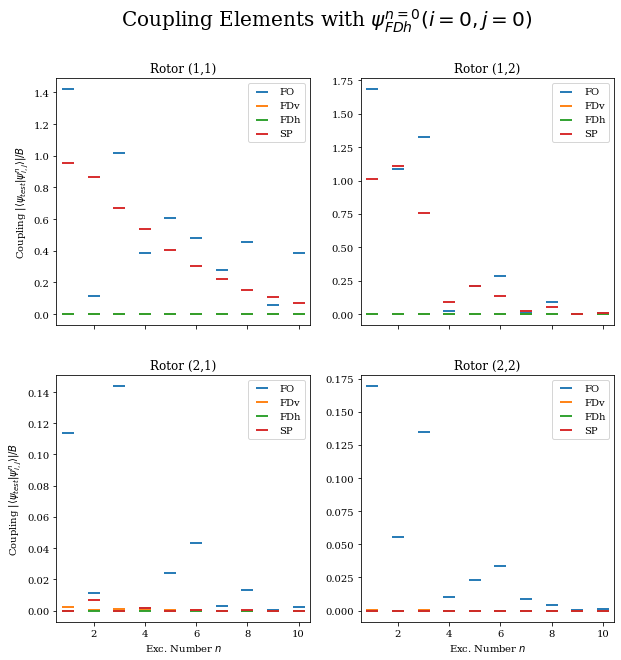

In [18]:
index_i1 = 0 # rotor index along My
index_j1 = 0 # rotor index along Mx

index_i2 = 0 # rotor index along My
index_j2 = 1 # rotor index along Mx

index_i3 = 1 # rotor index along My
index_j3 = 0 # rotor index along Mx

index_i4 = 1 # rotor index along My
index_j4 = 1 # rotor index along Mx

state_to_couple = new_ref_gs_fdh

E1_arr_0, E1_arr_1, E1_arr_2, E1_arr_3 = coupling_state_with_exc_energies(index_i1, index_j1, exc_number, state_to_couple,
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E2_arr_0, E2_arr_1, E2_arr_2, E2_arr_3 = coupling_state_with_exc_energies(index_i2, index_j2, exc_number, state_to_couple,
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E3_arr_0, E3_arr_1, E3_arr_2, E3_arr_3 = coupling_state_with_exc_energies(index_i3, index_j3, exc_number, state_to_couple,
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E4_arr_0, E4_arr_1, E4_arr_2, E4_arr_3 = coupling_state_with_exc_energies(index_i4, index_j4, exc_number, state_to_couple,
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)

scale = B
print('E-Scale =', scale)

print('\nE Rotor (1,1) =', E1_arr_0)
print('E diff Rotor (1,1) =', np.diff(E1_arr_0))

print('\nE Rotor (1,2) =', E2_arr_0)
print('E diff Rotor (1,2) =', np.diff(E2_arr_0))

print('\nE Rotor (2,1) =', E3_arr_0)
print('E diff Rotor (2,1) =', np.diff(E3_arr_0))

print('\nE Rotor (2,2) =', E4_arr_0)
print('E diff Rotor (2,2) =', np.diff(E4_arr_0))

E1_offset = 0 #np.min([E1_arr_0, E1_arr_1, E1_arr_2, E1_arr_3])
E2_offset = 0 #np.min([E2_arr_0, E2_arr_1, E2_arr_2, E2_arr_3])
E3_offset = 0 #np.min([E3_arr_0, E3_arr_1, E3_arr_2, E3_arr_3])
E4_offset = 0 #np.min([E4_arr_0, E4_arr_1, E4_arr_2, E4_arr_3])

print('\n E1 offset =', E1_offset)
print('E2 offset =', E2_offset)
print('E3 offset =', E3_offset)
print('E4 offset =', E4_offset)

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('font', family='serif')

fig = plt.figure(figsize=(10,10)) 
gs = fig.add_gridspec(2,2, hspace=0.2, wspace=0.2)
axs = gs.subplots(sharex=True)

plt.suptitle(r'Coupling Elements with $\psi_{FDh}^{n=0}(i=0,j=0)$', fontsize=20)

axs[0,0].scatter(np.arange(exc_number-1)+1, np.abs(E1_arr_0-E1_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[0,0].scatter(np.arange(exc_number-1)+1, np.abs(E1_arr_1-E1_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[0,0].scatter(np.arange(exc_number-1)+1, np.abs(E1_arr_2-E1_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[0,0].scatter(np.arange(exc_number-1)+1, np.abs(E1_arr_3-E1_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[0,1].scatter(np.arange(exc_number-1)+1, np.abs(E2_arr_0-E2_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[0,1].scatter(np.arange(exc_number-1)+1, np.abs(E2_arr_1-E2_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[0,1].scatter(np.arange(exc_number-1)+1, np.abs(E2_arr_2-E2_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[0,1].scatter(np.arange(exc_number-1)+1, np.abs(E2_arr_3-E2_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[1,0].scatter(np.arange(exc_number-1)+1, np.abs(E3_arr_0-E3_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[1,0].scatter(np.arange(exc_number-1)+1, np.abs(E3_arr_1-E3_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[1,0].scatter(np.arange(exc_number-1)+1, np.abs(E3_arr_2-E3_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[1,0].scatter(np.arange(exc_number-1)+1, np.abs(E3_arr_3-E3_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[1,1].scatter(np.arange(exc_number-1)+1, np.abs(E4_arr_0-E4_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[1,1].scatter(np.arange(exc_number-1)+1, np.abs(E4_arr_1-E4_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[1,1].scatter(np.arange(exc_number-1)+1, np.abs(E4_arr_2-E4_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[1,1].scatter(np.arange(exc_number-1)+1, np.abs(E4_arr_3-E4_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[0,0].legend(loc='upper right') 
axs[0,1].legend(loc='upper right') 
axs[1,0].legend(loc='upper right')
axs[1,1].legend(loc='upper right') 

axs[0,0].set_title(r'Rotor (1,1)')
axs[0,1].set_title(r'Rotor (1,2)')
axs[1,0].set_title(r'Rotor (2,1)')
axs[1,1].set_title(r'Rotor (2,2)')

axs[0,0].set_ylabel(r'Coupling $|\langle\psi_{test}|\psi_{i,j}^n\rangle|/B$')
axs[1,0].set_ylabel(r'Coupling $|\langle\psi_{test}|\psi_{i,j}^n\rangle|/B$')
axs[1,0].set_xlabel(r'Exc. Number $n$')
axs[1,1].set_xlabel(r'Exc. Number $n$')

plt.savefig(results_path+'coupling_horizontal_ferro-domain_gs_with_excited_states_total_configuration.svg')

### Here begins an experimental section

In [19]:
def create_patch_excitation(psi_ref, psi_exc_states, multi_ref_object):
    psi = psi_ref.copy()

    psi[0,0] = multi_ref_object.set_phase(psi_exc_states[0,0,1]) 
    psi[5,0] = multi_ref_object.set_phase(psi_exc_states[5,0,1]) 
    psi[0,5] = multi_ref_object.set_phase(psi_exc_states[0,5,1]) 
    psi[5,5] = multi_ref_object.set_phase(psi_exc_states[5,5,1]) 

    psi[0,1] = multi_ref_object.set_phase(psi_exc_states[0,1,1]) 
    psi[5,1] = multi_ref_object.set_phase(psi_exc_states[5,1,1]) 
    psi[0,4] = multi_ref_object.set_phase(psi_exc_states[0,4,1]) 
    psi[5,4] = multi_ref_object.set_phase(psi_exc_states[5,4,1]) 

    psi[1,0] = multi_ref_object.set_phase(psi_exc_states[1,0,1]) 
    psi[4,0] = multi_ref_object.set_phase(psi_exc_states[4,0,1]) 
    psi[1,5] = multi_ref_object.set_phase(psi_exc_states[1,5,1]) 
    psi[4,5] = multi_ref_object.set_phase(psi_exc_states[4,5,1]) 


    return psi

def create_wall_excitation(psi_ref, psi_exc_states, multi_ref_object):
    psi = psi_ref.copy()

    psi[0,0] = multi_ref_object.set_phase(psi_exc_states[0,0,1]) 
    psi[1,0] = multi_ref_object.set_phase(psi_exc_states[1,0,1]) 
    psi[2,0] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[3,0] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[4,0] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[5,0] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 

    return psi

def create_wall_excitation_1(psi_ref, psi_exc_states, multi_ref_object):
    psi = psi_ref.copy()

    psi[0,-1] = multi_ref_object.set_phase(psi_exc_states[0,0,1]) 
    psi[1,-1] = multi_ref_object.set_phase(psi_exc_states[1,0,1]) 
    psi[2,-1] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[3,-1] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[4,-1] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[5,-1] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 

    return psi

Create a list object that contains states with specific excitations.

In [20]:
psi_arr = []

psi_arr.append(new_ref_gs)
psi_arr.append(new_ref_gs_fdv)
psi_arr.append(new_ref_gs_fdh)
psi_arr.append(new_ref_gs_sp)

psi_arr_s = []
psi_arr = mult_ref_object.append_single_excitation(new_ref_gs, psi_arr, ref_exc_states)
psi_arr = mult_ref_object.append_single_excitation(new_ref_gs_fdv, psi_arr, ref_exc_states_fdv)
psi_arr = mult_ref_object.append_single_excitation(new_ref_gs_fdh, psi_arr, ref_exc_states_fdh)
psi_arr = mult_ref_object.append_single_excitation(new_ref_gs_sp, psi_arr, ref_exc_states_sp)

psi_arr_d = []
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs, psi_arr_d, ref_exc_states)
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs_fdv, psi_arr_d, ref_exc_states_fdv)
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs_fdh, psi_arr_d, ref_exc_states_fdh)
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs_sp, psi_arr_d, ref_exc_states_sp)

n_states = len(psi_arr)
q_arr = np.zeros((n_states,2), dtype=complex)

n_states_s = len(psi_arr_s)
q_arr_s = np.zeros((n_states_s,2), dtype=complex)

n_states_d = len(psi_arr_d)
q_arr_d = np.zeros((n_states_d,2), dtype=complex)

print(n_states)
print(n_states_s)
print(n_states_d)

1444
0
0


(1.846196999638905e-12-1.6000602348741895e-14j)
(-398.7092751160475+2.107447054555972e-18j)
(-206.3438015769326-2.2374003552767013e-17j)


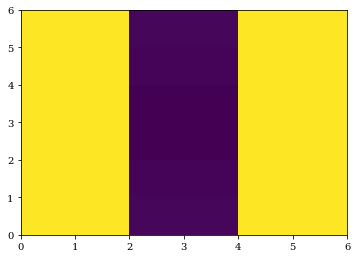

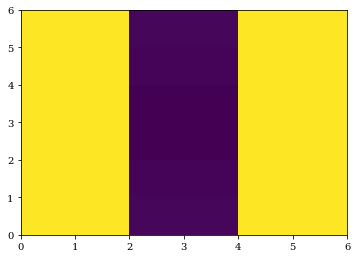

In [21]:
psi1 = psi_arr[1] #create_wall_excitation(new_ref_gs, ref_exc_states, mult_ref_object) # psi_arr_s[0]
psi2 = new_ref_gs_fdv.copy() #create_wall_excitation(new_ref_gs, ref_exc_states, mult_ref_object) # psi_arr_s[360]
psi2[2,4] = ref_exc_states_fdv[2,4,2]

E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(psi1, q, psi2, q)
print(E12)

E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(psi1, q, psi1, q)
print(E12)

E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(psi2, q, psi2, q)
print(E12)

ref_state_sigma = polaron_size_object.calc_polaron_size(psi1, '1')
plt.pcolormesh(ref_state_sigma)
plt.show()

ref_state_sigma = polaron_size_object.calc_polaron_size(psi2, '1')
plt.pcolormesh(ref_state_sigma)
plt.show()

Compute effective Hamiltonian from this list of states.

In [22]:
h_eff, s_ove = coupl_object.calc_hamiltonian(n_states, psi_arr, q_arr)

print('H_eff shape =', h_eff.shape)
print('H_eff min =', np.min(h_eff))
print('H_eff max =', np.max(h_eff))

print('\nS min =', np.min(s_ove))
print('S max =', np.max(s_ove))

H_eff shape = (1444, 1444)
H_eff min = (-421.70353476951675-1.32536786272834e-18j)
H_eff max = (95.68246089860939+0.22976531167631145j)

S min = (-0.2063677328623112-2.1049105957218692e-12j)
S max = (1.0000004044172381+0j)


Visualize the effective Hamiltonian

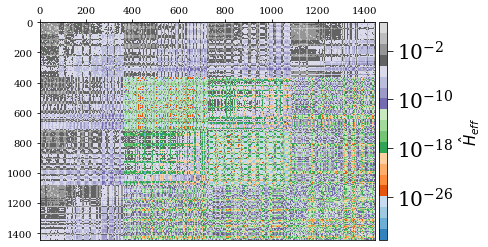

In [66]:
%matplotlib inline
fig = plt.figure() 
ax = plt.gca() 

pc = plt.pcolormesh(np.abs(h_eff), norm=matplotlib.colors.LogNorm(), cmap='tab20c')

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(pc, cax=cax)
cbar.ax.tick_params(labelsize=20, length=6)
cbar.set_label(label=r'$\hat{H}_{eff}$', size=15)

ax.invert_yaxis()
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

#plt.savefig('h_eff_fo_sp_30_excitations.png', dpi=400)

(array([1.6000e+01, 1.2800e+02, 3.1400e+02, 5.9200e+02, 1.1650e+03,
        2.1250e+03, 1.7880e+03, 1.1060e+03, 6.0600e+02, 4.3800e+02,
        3.3000e+02, 4.6100e+02, 1.0210e+03, 1.5740e+03, 4.3220e+03,
        7.1040e+03, 9.3320e+03, 1.5373e+04, 2.0364e+04, 1.5643e+04,
        9.4400e+03, 2.1740e+03, 1.2420e+03, 8.7200e+02, 9.9000e+02,
        1.0740e+03, 1.1960e+03, 1.0760e+03, 1.4320e+03, 2.5960e+03,
        2.3160e+03, 2.3160e+03, 3.2540e+03, 4.5380e+03, 6.2680e+03,
        7.5140e+03, 1.1224e+04, 1.4520e+04, 1.7522e+04, 2.1288e+04,
        2.0684e+04, 2.2562e+04, 2.0464e+04, 2.0745e+04, 1.8923e+04,
        1.8404e+04, 1.5934e+04, 1.7364e+04, 1.7876e+04, 2.0386e+04,
        2.2897e+04, 2.7825e+04, 2.9798e+04, 3.0966e+04, 3.0456e+04,
        2.5485e+04, 2.1407e+04, 1.9066e+04, 2.0478e+04, 1.8450e+04,
        1.7090e+04, 1.5326e+04, 1.7548e+04, 1.4440e+04, 1.8002e+04,
        1.9690e+04, 2.1850e+04, 2.2756e+04, 2.9826e+04, 3.3434e+04,
        3.9108e+04, 4.4374e+04, 5.1706e+04, 6.24

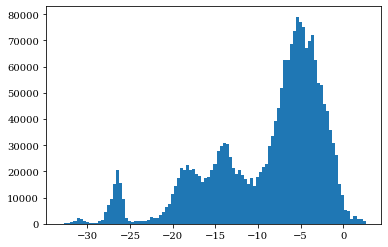

In [61]:
plt.hist(np.log10(np.abs(h_eff)).flatten(), bins=100)

Now, diagonalize the effective Hamiltonian, i.e. solve the generalized eigenvalue problem $H_{eff} \lvert\psi\rangle = E S \lvert\psi\rangle$

In [29]:
eigen_values, eigen_vector_h, eigen_vector_s = coupl_object.diag_hamiltonian(h_eff, s_ove)

print('min e-val =', np.min(eigen_values))
print('max e-val =', np.max(eigen_values))

min e-val = -422.37989435298937
max e-val = 271.5003851858661


Visualize the spectrum

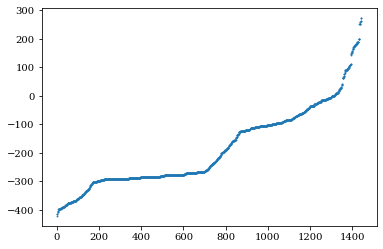

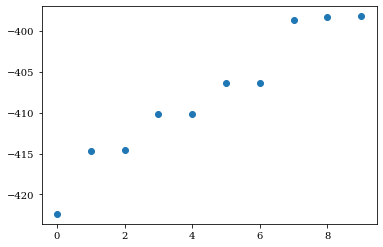

[7.65467928 0.1201989  4.45528709 0.01966397 3.76113286 0.02596372
 7.64343131 0.40744707 0.08937283]


In [55]:
plt.scatter(np.arange(len(eigen_values)), eigen_values, s=0.7); plt.show()
plt.scatter(np.arange(10), eigen_values[0:10]); plt.show()
print(np.diff(eigen_values[0:10]))

Now, we analyze the densities of the excitations.

In [31]:
def normalize_eigenvector_h(e_ket_h, s_overlap):
    for j in range(n_states):
        ket_norm = np.sqrt(np.conjugate(e_ket_h[:,j].T)@s_overlap@e_ket_h[:,j])
        e_ket_h[:,j] = e_ket_h[:,j]/ket_norm
    
    return e_ket_h

In [32]:
def density_of_new_exc_state(m_i, n_i, selected_no_of_eigen_state):
    n = 256 

    density = np.zeros((n,n), dtype=complex)
    for i in range(n_states):
        for j in range(n_states):
            coeff_i = np.conjugate(eigen_vector_h[:,selected_no_of_eigen_state][i])
            coeff_j = eigen_vector_h[:,selected_no_of_eigen_state][j]

            psi_i = psi_arr[i].copy()
            psi_j = psi_arr[j].copy()

            psi_i[m_i,n_i,:] = (1/n**0.5)*np.ones((n,), dtype=complex)
            psi_j[m_i,n_i,:] = (1/n**0.5)*np.ones((n,), dtype=complex)

            # s_term0 = s_ove[i,j] #coupl_object.calc_overlap(psi_i, psi_j)
            # exclude = np.sum(np.conjugate(psi_arr[i][m_i,n_i,:])*psi_arr[j][m_i,n_i,:])
            s_term  = coupl_object.calc_overlap(psi_i, psi_j) # s_term0/exclude #

            proj_term_i_j = np.outer(np.conjugate(psi_arr[i][m_i,n_i]), psi_arr[j][m_i,n_i]) 
            '''
            NOTE: the diagonal term of proj_term_i_j is equivalent to np.conjugate(psi_arr[i][m_i,n_i])*psi_arr[j][m_i,n_i]
            '''
            density += coeff_i*coeff_j*s_term*proj_term_i_j 

    return density/(My*Mx)

In [33]:
def get_density_on_first_quadrant(selected_no_of_eigen_state):
    quadrant_density = np.zeros((My,int(Mx/2),n,n), dtype=complex)

    for i in range(My):
        for j in range(int(Mx/2)):
            print(i,j)
            quadrant_density[i,j,:,:] = density_of_new_exc_state(i, j, selected_no_of_eigen_state)
    return quadrant_density

In [34]:
eigen_vector_h = normalize_eigenvector_h(eigen_vector_h, s_ove)

selected_no_of_eigen_state = 0
quadrant_density0 = get_density_on_first_quadrant(selected_no_of_eigen_state)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2
5 0
5 1
5 2


In [35]:
selected_no_of_eigen_state = 1
quadrant_density1 = get_density_on_first_quadrant(selected_no_of_eigen_state)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2
5 0
5 1
5 2


In [36]:
selected_no_of_eigen_state = 2
quadrant_density2 = get_density_on_first_quadrant(selected_no_of_eigen_state)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2
5 0
5 1
5 2


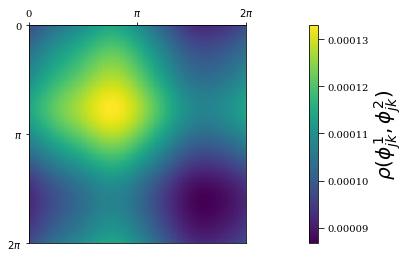

(1.0000000000001148-1.0853288131598098e-24j)
(0.9999999999999953-1.965347780821989e-24j)
(0.9999999999999768-7.910218272739451e-24j)


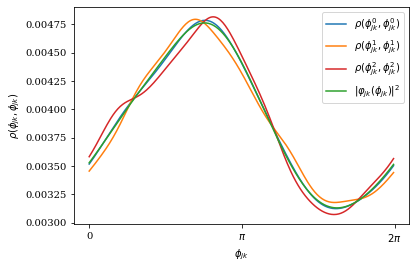

In [68]:
i1 = 1
j1 = 0

density_to_plot0 = quadrant_density0[i1,j1]
density_to_plot1 = quadrant_density1[i1,j1]
density_to_plot2 = quadrant_density2[i1,j1]

%matplotlib inline
fig = plt.figure() 
ax = plt.gca() 

pc = plt.pcolormesh(np.abs(density_to_plot0)) #, cmap='tab20c')

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(pc, cax=cax)
cbar.ax.tick_params(length=6)
cbar.set_label(label=r'$\rho (\phi_{jk}^1,\phi_{jk}^2)$', size=20)
ax.axis('square')

ax.invert_yaxis()
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.set_xticks([0,256/2,256],[r'0', r'$\pi$', r'$2\pi$'])
ax.set_yticks([0,256/2,256],[r'0', r'$\pi$', r'$2\pi$'])

plt.savefig('density_rotor_22.pdf', bbox_inches='tight')
plt.show()

print(np.sum(np.diag(density_to_plot0))*(Mx*My))
print(np.sum(np.diag(density_to_plot1))*(Mx*My))
print(np.sum(np.diag(density_to_plot2))*(Mx*My))

plt.plot(np.diag(density_to_plot0.real)*(Mx*My), color='tab:blue', label=r'$\rho (\phi^0_{jk},\phi^0_{jk})$')
plt.plot(np.diag(density_to_plot1.real)*(Mx*My), color='tab:orange', label=r'$\rho (\phi^1_{jk},\phi^1_{jk})$')
plt.plot(np.diag(density_to_plot2.real)*(Mx*My), color='tab:red', label=r'$\rho (\phi^2_{jk},\phi^2_{jk})$')

plt.plot(np.abs(psi_arr[0][i1,j1])**2, color='tab:green', label=r'$|\varphi_{jk}(\phi_{jk})|^2$')

plt.xticks([0,256/2,256],[r'0', r'$\pi$', r'$2\pi$'])
plt.xlabel(r'$\phi_{jk}$')
plt.ylabel(r'$\rho (\phi_{jk},\phi_{jk})$')
plt.legend()
plt.savefig('diag_density_rotor_22.pdf')

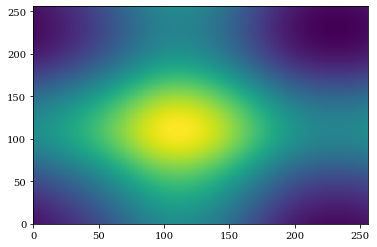

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


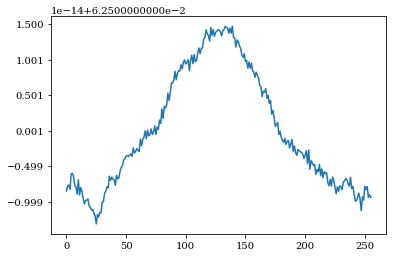

In [142]:
plt.pcolormesh(np.abs(np.outer(psi_arr[70][i1,j1],psi_arr[70][i1,j1]))); plt.show()
plt.plot(psi_arr[1][i1,j1])

In [147]:
%matplotlib qt
diag_quad_density = np.zeros((My,Mx,n), dtype=complex)
diag_quad_density0 = np.zeros((My,Mx,n), dtype=complex)
for i in range(int(My)):
    for j in range(int(Mx/2)):
        diag_quad_density[i,j,:] = np.diag(quadrant_density1[i,j]*(Mx*My))
        diag_quad_density0[i,j,:] = np.diag(quadrant_density0[i,j]*(Mx*My))

plot_rotor_wavefunction_first_quadrant(x, My, int(Mx/2), np.abs(diag_quad_density)-np.abs(diag_quad_density0), np.zeros((My,Mx,n), dtype=complex)) # np.abs(diag_quad_density0))# np.abs(psi_arr[0])**2)
plt.savefig('quadrant_densities_first_exc_state.pdf')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  re

In [76]:
trans_probs = coupl_object.transition_probabilities(n_states, eigen_vector_h, s_ove)

(4.0, 112.0)

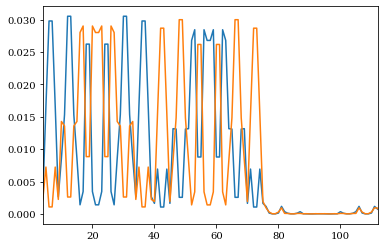

In [176]:
%matplotlib inline
plt.plot(trans_probs[1])
plt.plot(trans_probs[2])
plt.xlim(4,3*36+4)

1444
365 725
3.4462405733690846e-15
0.00047768548980921087
1.0283962566966327


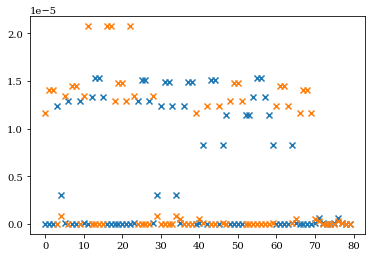

In [145]:
print(len(trans_probs))
%matplotlib inline
#plt.scatter(np.arange(len(trans_probs[0])), trans_probs[1], s=1)
block_no = 1
int_l = (block_no*10*36+5)
int_r = ((block_no+1)*10*36+5)
print(int_l,int_r)
print(np.sum(trans_probs[2][0:4]))
print(np.sum(trans_probs[2][int_l:int_r]))
print(np.sum(trans_probs[2]))
plt.scatter(np.arange(10*36)[0:80], trans_probs[1][int_l:int_r][0:80], marker='x')
#block_no = 0
int_l = (block_no*10*36+5)
int_r = ((block_no+1)*10*36+5)-1
plt.scatter(np.arange(10*36-1)[0:80], trans_probs[2][int_l:int_r][0:80], marker='x')

In [93]:
print(np.argwhere(h_eff == np.max(h_eff)))
print(h_eff[504,474])

[[504 474]]
(89.57367187971685-7.242957374632301e-07j)


[83 92 91 ...  0  2  1]
1.0012766157129827
(-2.3248499359714145-0.5078729645412672j)
(2.324850011094469+0.5078726199779844j)
132
(-0.18894328289029913-0.041275431900739325j)
(5.4378844680330924e-11+1.1854247111843052e-11j)
36.04595816566775
(2.8343477453795996e-10+0j)


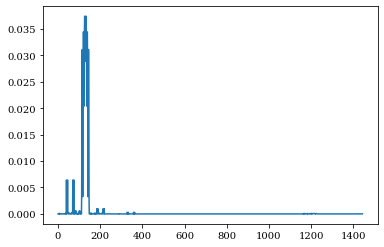

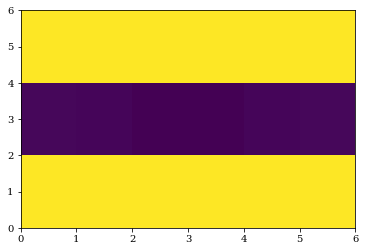

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


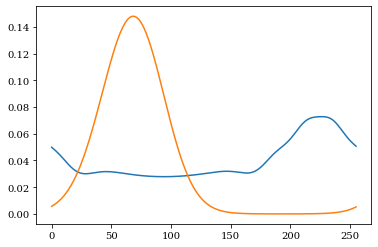

In [125]:
print(order)
#psi_arr = psi_arr[order]

psi_exc_n = diag_object.get_state_i(eigen_vector_h, 3)
norm = np.sum(np.abs(psi_exc_n*psi_exc_n))
print(norm)
print(np.min(h_eff@psi_exc_n-eigen_values[0]*s_ove@psi_exc_n))
print(np.max(h_eff@psi_exc_n-eigen_values[0]*s_ove@psi_exc_n))

print(np.argmax(np.abs(psi_exc_n)))
print(psi_exc_n[np.argmax(np.abs(psi_exc_n))])
print(psi_exc_n[1])

psi_gs_test = np.zeros(new_ref_gs.shape, dtype=complex)
norm_test = 0
for i in range(n_states):
    psi_gs_test += psi_exc_n[i]*psi_arr[i]
    norm_test += np.sum(np.abs(psi_exc_n[i]*psi_arr[i])**2)
    #print(np.sum(np.abs(psi_exc_n[i]*psi_arr[i])**2))

overlap_gs_test = coupl_object.calc_overlap(psi_gs_test, psi_gs_test)
#norm_test = np.sum(np.abs(psi_gs_test[3,3])**2)
print(norm_test)
print(overlap_gs_test)

%matplotlib inline
plt.plot(np.abs(psi_exc_n)**2)
plt.show()

ref_state_sigma = polaron_size_object.calc_polaron_size(psi_exc_n[752]*psi_arr[752], '1')
plt.pcolormesh(ref_state_sigma)
plt.show()

plt.plot(psi_gs_test[5,5])
plt.plot(psi_arr[752][0,0])

/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


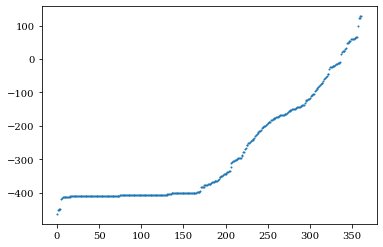

In [32]:
%matplotlib inline
plt.scatter(np.arange(len(eigen_values)), eigen_values, s=1)

In [ ]:
E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(new_ref_gs, q, new_ref_gs, q)
print(E12)

(-421.70353653457187+4.0765696204895404e-19j)


### Create the new reference configuration from the diagonalization to ensure orthogonality!

In [ ]:
#new_ferro_gs = np.zeros((My,Mx,n), dtype=complex)

#for i in range(My):
#    for j in range(Mx):
#        new_ferro_gs[i,j] = psi_exc_states[i,j,0]
#        new_ferro_gs[i,j] = set_phase(new_ferro_gs[i,j], n) #np.sign(np.sum((1/(n)**0.5)*new_ferro_gs[i,j]))*new_ferro_gs[i,j]

#new_ferro_order_sigma = polaron_size_object.calc_polaron_size(new_ferro_gs, '1')
#plt.pcolormesh(new_ferro_order_sigma)

Demonstrate that 1st excited states are orthogonal to the new ground state reference

In [ ]:
index_i1 = 3
index_j1 = 4

index_i1_1 = 7
index_j1_1 = 2

index_i2 = 4
index_j2 = 4

index_i2_2 = 7
index_j2_2 = 2

n_excited_state = 1

full_exc_sample_wf = new_ferro_gs.copy()
full_exc_sample_wf[index_i1,index_j1] = set_phase(psi_exc_states[index_i1,index_j1,n_excited_state], n)
full_exc_sample_wf[index_i1_1,index_j1_1] = set_phase(psi_exc_states[index_i1_1,index_j1_1,n_excited_state], n)

full_exc_sample_wf2 = new_ferro_gs.copy()
full_exc_sample_wf2[index_i2,index_j2] = set_phase(psi_exc_states[index_i2,index_j2,n_excited_state], n)
full_exc_sample_wf2[index_i2_2,index_j2_2] = set_phase(psi_exc_states[index_i2_2,index_j2_2,n_excited_state], n)

overlap = coupl_object.calc_overlap(new_ferro_gs, full_exc_sample_wf)
E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(new_ferro_gs, np.array([0,0]), full_exc_sample_wf, np.array([0,0]))
print("Overlap Excitation with RF configuration =", overlap)
print("Coupling term <psi_RF|H|psi_EX>: ", E12, "\n")

E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(full_exc_sample_wf, np.array([0,0]), full_exc_sample_wf2, np.array([0,0]))
print("Coupling term <psi_RF|H|psi_EX>: ", E12, "\n")
overlap = coupl_object.calc_overlap(full_exc_sample_wf, full_exc_sample_wf2)
print("Overlap new ferro RF and old ferro order RF configuration =", overlap)

overlap = coupl_object.calc_overlap(new_ferro_gs, ferro_order)
print("Overlap new ferro RF and old ferro order RF configuration =", overlap)

NameError: name 'new_ferro_gs' is not defined

Demonstrate the location of the excitation

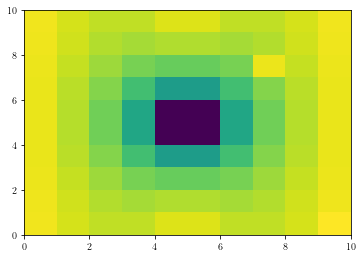

In [ ]:
new_ferro_order_sigma = polaron_size_object.calc_polaron_size(full_exc_sample_wf2, '1')
plt.pcolormesh(new_ferro_order_sigma[::-1,::])

#plt.plot(full_exc_sample_wf[0,0])

### Create the wavefunction list containing all single-rotor excitations

In [ ]:
psi_arr = []

psi_arr.append(new_ferro_gs)

for m in range(1,exc_number):
    print("m", m)
    for i in range(My):
        for j in range(Mx):
            psi = new_ferro_gs.copy()
            psi[i,j] = set_phase(psi_exc_states[i,j,m], n) #np.sign(np.sum((1/(n)**0.5)*psi_exc_states[i,j,m]))*psi_exc_states[i,j,m] # psi_exc_states[i,j,n]

            psi_arr.append(psi)

index_list_rotor_1, index_list_rotor_2 = get_double_rotor_excitation_list(My, Mx)
inter_combinations = len(index_list_rotor_1)

for m1 in range(1,exc_number):
    for m2 in range(1,exc_number):
        for i in range(inter_combinations):
            index_rotor_1 = index_list_rotor_1[i]
            index_rotor_2 = index_list_rotor_2[i]

            psi = new_ferro_gs.copy()
            psi[index_rotor_1[0],index_rotor_1[1]] = set_phase(psi_exc_states[index_rotor_1[0],index_rotor_1[1],m1], n) #np.sign(np.sum((1/(n)**0.5)*psi_exc_states[i,j,m]))*psi_exc_states[i,j,m] # psi_exc_states[i,j,n]
            psi[index_rotor_2[0],index_rotor_2[1]] = set_phase(psi_exc_states[index_rotor_2[0],index_rotor_2[1],m2], n) #np.sign(np.sum((1/(n)**0.5)*psi_exc_states[i,j,m]))*psi_exc_states[i,j,m] # psi_exc_states[i,j,n]

            psi_arr.append(psi)

n_states = len(psi_arr)
q_arr = np.zeros((n_states,2), dtype=complex)

print("No. of states =", n_states)

h_eff, s_ove = coupl_object.calc_hamiltonian(n_states, psi_arr, q_arr)
print("Finished calculation of Hamiltonian!")

m 1
No. of states = 5051


KeyError: 'n_states'

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


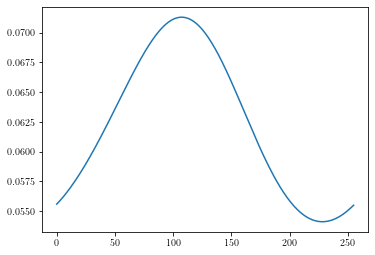

In [ ]:
plt.plot(psi_arr[0][0,0])

-1.2789769243681803e-13
1.2789769243681803e-13
-7.130764943871966e-16
7.082272611231832e-16


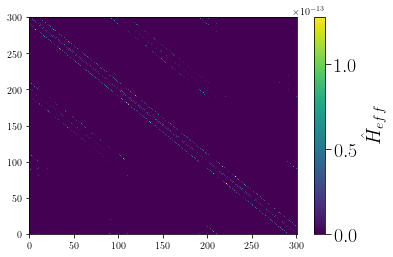

In [ ]:
%matplotlib inline
check = np.conjugate(h_eff.T)-h_eff

print(np.min(check.real))
print(np.max(check.real))

print(np.min(check.imag))
print(np.max(check.imag))

fig = plt.figure()
pc = plt.pcolormesh(np.abs(check)[::-1,::])
cbar = fig.colorbar(pc)
cbar.ax.tick_params(labelsize=20, length=6)
cbar.set_label(label=r'$\hat{H}_{eff}$', size=20)

In [ ]:
e_vals, e_kets, s_e_vec = coupl_object.diag_hamiltonian(h_eff, s_ove)

(301, 301)
5.636519353268774e-08
(array([0]),)
[[-0.99999988+5.80587997e-11j]]


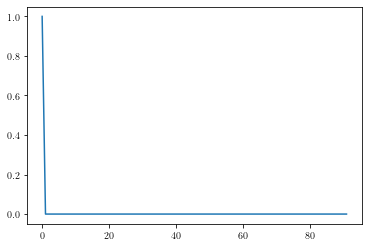

In [ ]:
print(e_kets.shape)
print(np.sum(np.abs(e_kets[0,1])**2))
plt.plot(np.arange(92), np.abs(e_kets[0:92,0])**2)
print(np.where(np.abs(e_kets[:, 0])**2 > 1e-6))
print(e_kets[np.where(np.abs(e_kets[:, 0])**2 > 1e-6), 0])

Max e-vals = 274.5057800509657
Min e-vals = -307.9659728330046


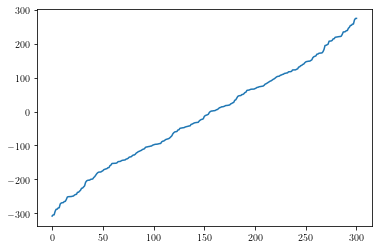

In [ ]:
plt.plot(e_vals)
print("Max e-vals =", np.max(e_vals))
print("Min e-vals =", np.min(e_vals))

(array([ 3.,  3.,  2.,  6.,  6.,  5.,  4.,  4.,  2.,  8.,  3.,  9.,  4.,
        10.,  9.,  6.,  7.,  9., 11.,  6.,  3.,  6., 11.,  8.,  5.,  5.,
         9., 10.,  6.,  3.,  7.,  6., 13.,  6.,  6.,  8., 12.,  4.,  6.,
         6.,  6.,  5.,  1.,  4.,  6.,  8.,  5.,  2.,  4.,  3.]),
 array([-307.96597283, -296.31653778, -284.66710272, -273.01766766,
        -261.3682326 , -249.71879754, -238.06936249, -226.41992743,
        -214.77049237, -203.12105731, -191.47162226, -179.8221872 ,
        -168.17275214, -156.52331708, -144.87388203, -133.22444697,
        -121.57501191, -109.92557685,  -98.27614179,  -86.62670674,
         -74.97727168,  -63.32783662,  -51.67840156,  -40.02896651,
         -28.37953145,  -16.73009639,   -5.08066133,    6.56877372,
          18.21820878,   29.86764384,   41.5170789 ,   53.16651396,
          64.81594901,   76.46538407,   88.11481913,   99.76425419,
         111.41368924,  123.0631243 ,  134.71255936,  146.36199442,
         158.01142947,  169.66086453

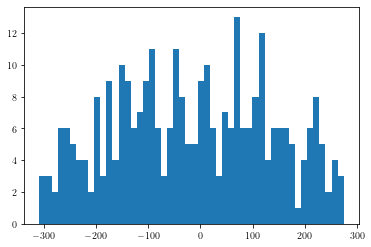

In [ ]:
plt.hist(e_vals, bins=50)
#plt.xlim(-0.5e25,0.5e25)

0.04993726380265718
(-0.002331400992079055+5.668912157137587e-15j)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


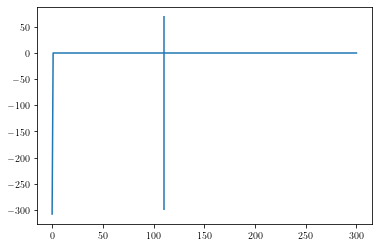

In [ ]:
%matplotlib inline
plt.plot(h_eff[0])
print(np.max(np.abs(h_eff)[0][1:201]))
print(h_eff[0,111])
plt.vlines(x=110, ymin=-300, ymax=70)

In [ ]:
%matplotlib qt
fig = plt.figure()
pc = plt.pcolormesh(np.abs(h_eff)[::-1,::])
cbar = fig.colorbar(pc)
cbar.ax.tick_params(labelsize=20, length=6)
cbar.set_label(label=r'$\hat{H}_{eff}$', size=20)

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


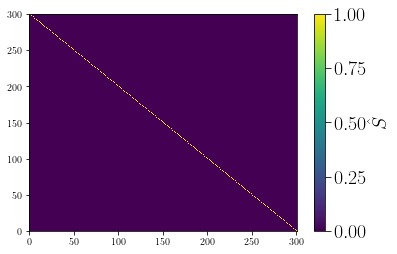

In [ ]:
%matplotlib inline
fig = plt.figure()
pc = plt.pcolormesh(np.abs(s_ove)[::-1,::])
cbar = fig.colorbar(pc)
cbar.ax.tick_params(labelsize=20, length=6)
cbar.set_label(label=r'$\hat{S}$', size=20)

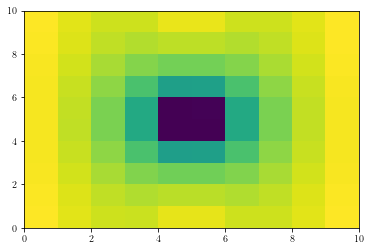

In [ ]:
new_ferro_order_sigma = polaron_size_object.calc_polaron_size(psi_arr[105], '1')
plt.pcolormesh(new_ferro_order_sigma)

In [ ]:
np.sum(psi_arr[160]-psi_arr[105])

(0.012063721103999114-2.0679515313825692e-25j)

In [ ]:
import scipy
scipy.linalg.eig(np.ones((10,10)))

(array([ 0.+0.j, 10.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j]),
 array([[-9.48683298e-01,  3.16227766e-01, -5.55111512e-18,
         -5.55111512e-18, -5.55111512e-18, -5.55111512e-18,
         -5.55111512e-18, -5.55111512e-18, -5.55111512e-18,
         -5.55111512e-18],
        [ 1.05409255e-01,  3.16227766e-01, -3.33333333e-01,
         -3.33333333e-01, -3.33333333e-01, -3.33333333e-01,
         -3.33333333e-01, -3.33333333e-01, -3.33333333e-01,
         -3.33333333e-01],
        [ 1.05409255e-01,  3.16227766e-01,  9.16666667e-01,
         -8.33333333e-02, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02],
        [ 1.05409255e-01,  3.16227766e-01, -8.33333333e-02,
          9.16666667e-01, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02],
        [ 1.05409255e-01,  3.16227766e-01, -8.33333333e-02,
    

In [ ]:
index_list = [np.array([0,0])]

My = 4
Mx = 4 
iter = 0
for i in range(My):
    for j in range(Mx):
        for k in range(My):
            for p in range(Mx):
                index_arr = np.array([k,p])
                #if np.any(np.isin(index_arr, np.array([i,j]))) or np.any(np.isin(index_arr, np.array([j,i]))): # and (np.any(np.isin(index_list, index_arr)) or np.any(np.isin(index_list, index_arr[::1]))):
                if np.any(np.isin(index_arr, np.array([j,i]))) != False and k != p:
                    iter += 1  
                    index_list.append(index_arr)          

M = int(My*Mx)
print(M)
print(M*(M-1)/2)
print(iter)
#print(index_list)
print(len(index_list))

16
120.0
144
145


In [ ]:
index_list = []
index_mat = np.zeros((My,Mx,My,Mx,2), dtype=int)
iter_i_before = 1

for i in range(My):
    iter_j_before = 1
    for j in range(Mx):
        if iter_i_before > i and iter_j_before > j:
            index_arr = np.array([i,j])

            index_mat[i,j,k,p] = index_arr
            index_list.append(index_arr)
    
        iter_j_before += 1
        #for k in range(My):
        #    for p in range(Mx):
    iter_i_before += 1            

print(len(index_list))
print(index_list)
print(index_mat[0,0])
print(index_mat.shape)

16
[array([0, 0]), array([0, 1]), array([0, 2]), array([0, 3]), array([1, 0]), array([1, 1]), array([1, 2]), array([1, 3]), array([2, 0]), array([2, 1]), array([2, 2]), array([2, 3]), array([3, 0]), array([3, 1]), array([3, 2]), array([3, 3])]
[[[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]]
(4, 4, 4, 4, 2)


In [ ]:
index_list = [np.array([1,1])]
index_list = index_list.append(np.array([1,2]))
print(index_list)

np.isin(index_list, np.array([0,0]))

None


array(False)

In [ ]:
import numpy as np

In [ ]:
index_list_rotor_1, index_list_rotor_2 = get_double_rotor_excitation_list(My, Mx)

M = My*Mx
print(M*(M-1)/2)
print(len(index_list_rotor_1))
print(len(index_list_rotor_2))

4950.0
4950
4950


In [ ]:
print(len(index_list))
print(index_list)

4950
[array([0, 1]), array([0, 2]), array([0, 3]), array([0, 4]), array([0, 5]), array([0, 6]), array([0, 7]), array([0, 8]), array([0, 9]), array([1, 0]), array([1, 1]), array([1, 2]), array([1, 3]), array([1, 4]), array([1, 5]), array([1, 6]), array([1, 7]), array([1, 8]), array([1, 9]), array([2, 0]), array([2, 1]), array([2, 2]), array([2, 3]), array([2, 4]), array([2, 5]), array([2, 6]), array([2, 7]), array([2, 8]), array([2, 9]), array([3, 0]), array([3, 1]), array([3, 2]), array([3, 3]), array([3, 4]), array([3, 5]), array([3, 6]), array([3, 7]), array([3, 8]), array([3, 9]), array([4, 0]), array([4, 1]), array([4, 2]), array([4, 3]), array([4, 4]), array([4, 5]), array([4, 6]), array([4, 7]), array([4, 8]), array([4, 9]), array([5, 0]), array([5, 1]), array([5, 2]), array([5, 3]), array([5, 4]), array([5, 5]), array([5, 6]), array([5, 7]), array([5, 8]), array([5, 9]), array([6, 0]), array([6, 1]), array([6, 2]), array([6, 3]), array([6, 4]), array([6, 5]), array([6, 6]), arra

In [ ]:
(0,0)->(0,1),(0,0)->(1,0),(0,0)->(1,1)
(0,1)->(1,0),(0,1)->(1,1)
(1,0)->(1,1)

SyntaxError: invalid syntax (2176338191.py, line 1)

In [ ]:
iter = 0

for i in range(1,3):
    for j in range(1,3):
        iter += 1

print(iter)

4
